# NatComp Cookhouse

## Intro

* **Date**: 11/30/2020
* **What**: I'm not even really sure yet.  Basically I just want a form of network where the winner naturally rises to the top, instead of me having to find the argmax of a bunch of rows of an array.  This all came up because I was about to implement multi CompSpec, and I realized how computationally complex it is going to be.  I want something more natural, where I don't have to do a bunch of computations to calculate an output.
* **Why**: I'm trying to make my networks as efficient as possible.  And an $O(n^2)$ algorithm ain't cheap in a network with a fuckton of neurons.
* **Hopes**: I hope I can find an architecture that naturally brings the winners to the top, and puts the losers on the bottom.  * **Limitations**: I don't really know what I'm doing, and everything I've tried along this avenue has failed so far.  Go team!

## Analysis Dialog

I'm just going to try a bunch of shit, and see what works.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from time import time
from tensorflow.keras.datasets import mnist
from tqdm import tqdm

L = 28 * 28   #Size of mnist in pixels
S = 60000     #Size of training set

(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0

flat_x = np.reshape(train_X, [-1, L])
flat_test = np.reshape(test_X, [-1, L])

In [2]:
def draw_weights(synapses, Kx, Ky):
    yy=0
    HM=np.zeros((28*Ky,28*Kx))
    for y in range(Ky):
        for x in range(Kx):
            HM[y*28:(y+1)*28,x*28:(x+1)*28]=synapses[yy,:].reshape(28,28)
            yy += 1
    plt.clf()
    nc=np.amax(np.absolute(HM))
    im=plt.imshow(HM,cmap='bwr',vmin=-nc,vmax=nc)
    fig.colorbar(im,ticks=[0, np.amax(HM)])
    plt.axis('off')
    fig.canvas.draw()   

<IPython.core.display.Javascript object>


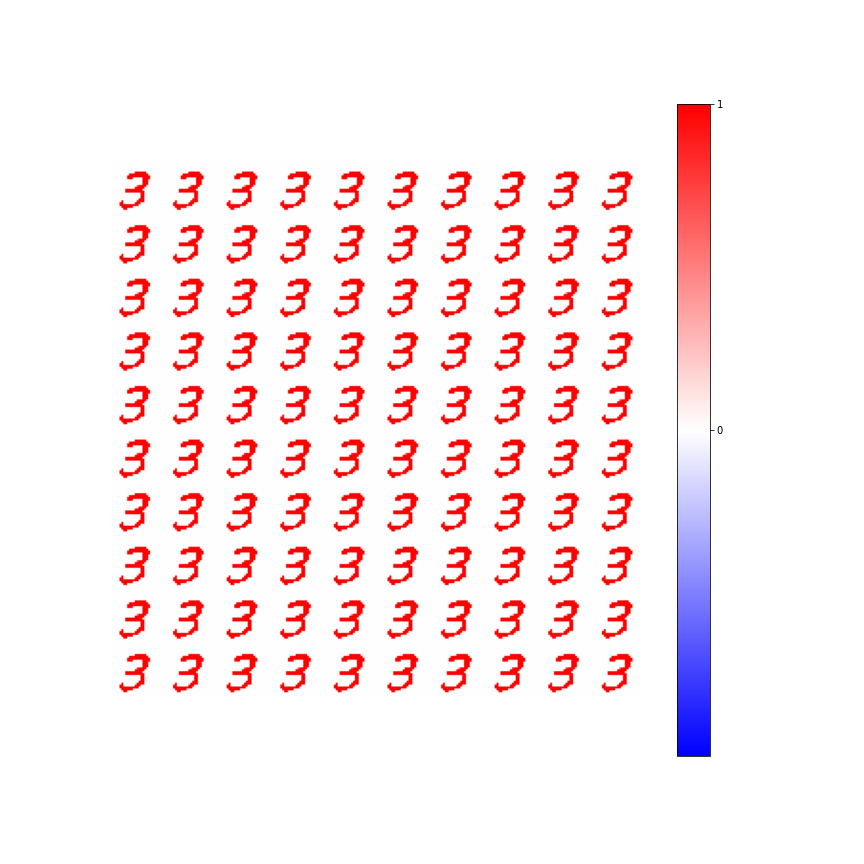

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


<IPython.core.display.Javascript object>


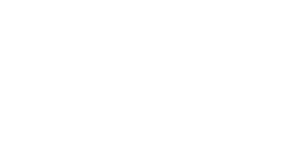

In [44]:
%matplotlib inline
%matplotlib notebook
fig=plt.figure(figsize=(12,12))

w_max = 1
Kx = 10
Ky = 10
xi = 0.1

zeta = 0.001

cycles = 10000

N = Kx * Ky

w = np.random.uniform(0.01 * w_max, 0.99 * w_max, (N, L))

c_i = np.ones((N, N))
np.fill_diagonal(c_i, 0)

v = flat_x[7].reshape(1, -1)

for cy in range(cycles):
    p1 = np.tanh((w @ v.T) / 70)
    
#     print(p1)
        
    v_0 = p1 * np.exp(-1 * zeta * (c_i @ p1))
    
    w += xi * (w_max - w) * w * (v - v_0) * v_0
    
    if cy % 1000 == 0:
        print(cy)
        draw_weights(w, 10, 10)

AAAHAHAHAHAHAHAHAHAHAHAAHAHAHHAHH!!!! FUUUUCCCCKKK THIS!  I fucking hate Natural Competition.  Fuck THIS

## Conclusions
Natural Competition is the worst and I hate it.

## Next steps
Maybe (keyword, *M